# Navigation

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
import time
%matplotlib inline
from unityagents import UnityEnvironment

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
env = UnityEnvironment(file_name="./Banana_Windows_x86_64/Banana.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)
env_info.vector_observations[0]

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


array([1.        , 0.        , 0.        , 0.        , 0.84408134,
       0.        , 0.        , 1.        , 0.        , 0.0748472 ,
       0.        , 1.        , 0.        , 0.        , 0.25755   ,
       1.        , 0.        , 0.        , 0.        , 0.74177343,
       0.        , 1.        , 0.        , 0.        , 0.25854847,
       0.        , 0.        , 1.        , 0.        , 0.09355672,
       0.        , 1.        , 0.        , 0.        , 0.31969345,
       0.        , 0.        ])

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agent while it is training**, and you should set `train_mode=True` to restart the environment.

In [5]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size) # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 0.0


### 4. Training agent

First, import an agent and initialize its hyperparameters.


In [11]:
from dqn_agent import Agent
state_size = brain.vector_observation_space_size
action_size = brain.vector_action_space_size
buffer_size = int(1e5)  # replay buffer size
batch_size = 256         # minibatch size
lr = 5e-4               # learning rate 
tau = 1e-3              # for soft update of target parameters
seed = 0
agent = Agent(state_size, action_size, seed, buffer_size, batch_size, lr, tau)

Second,define the Deep Q-Learning algorithm

In [12]:
def dqn(n_episodes, eps,update_every,gamma):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        eps:    eps[0]:eps_start,eps[1]:eps_decay,eps[2]:eps_end
                eps_start (float): starting value of epsilon, for epsilon-greedy action selection
                eps_end (float): minimum value of epsilon
                eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
       update_every: for soft update of target parameters
       gamma:   discount factor
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    epsilon = eps[0]                    # initialize epsilon
    start =time.clock()
    step = 0
    for i_episode in range(1, n_episodes+1):
       
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0]# get the current state
        score = 0  
        while True:
            action = agent.act(state, epsilon).astype(int) # select an action
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            agent.memory.add(state, action, reward, next_state, done)
            step = (step + 1) % update_every
            if (agent.memory.__len__() > agent.batch_size) & (step == 0):
                experiences = agent.memory.sample()
                agent.learn(experiences, gamma)
                
            score += reward                                # update the score
            state = next_state                             # roll over the state to next time step
            if done:                                       # exit loop if episode finished
                break
              
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        epsilon = max(eps[2], eps[1]*epsilon) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            end =time.clock()
            run_time = end-start
            start = time.clock()
            print('\rEpisode {}\tAverage Score: {:.2f}\tRunning time: {:.2f}S'.format(i_episode, np.mean(scores_window),run_time))
    torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
    return scores

Third,Using the Deep Q-Learning algorithms to train agents and visualize the training process.

Episode 100	Average Score: 0.24	Running time: 109.33S
Episode 200	Average Score: 1.40	Running time: 113.58S
Episode 300	Average Score: 5.06	Running time: 116.14S
Episode 400	Average Score: 6.92	Running time: 120.17S
Episode 500	Average Score: 8.58	Running time: 119.75S
Episode 600	Average Score: 11.64	Running time: 122.48S
Episode 700	Average Score: 12.81	Running time: 122.24S
Episode 800	Average Score: 13.93	Running time: 122.88S
Episode 900	Average Score: 15.00	Running time: 124.80S
Episode 1000	Average Score: 15.38	Running time: 123.22S
Episode 1100	Average Score: 15.34	Running time: 122.43S
Episode 1200	Average Score: 16.65	Running time: 121.64S
Episode 1300	Average Score: 16.84	Running time: 122.93S
Episode 1400	Average Score: 15.85	Running time: 122.22S
Episode 1500	Average Score: 17.24	Running time: 121.24S
Episode 1600	Average Score: 16.78	Running time: 122.73S
Episode 1700	Average Score: 17.34	Running time: 126.58S
Episode 1800	Average Score: 17.15	Running time: 127.79S


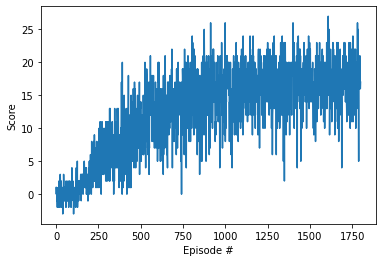

In [13]:
n_episodes=1800         #maximum number of training episodes
eps=[1.0,0.995,0.001]    #eps[0]:eps_start,eps[1]:eps_decay,eps[2]:eps_end
gamma = 0.99            # discount factor
update_every = 16        # how often to update the network

scores = dqn(n_episodes, eps,update_every,gamma)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 5. Play Banana game with agents


Use the trained agent to play the Banana game and display the game effect

In [18]:
# load the weights from file
agent.qnetwork_local.load_state_dict(torch.load('checkpoint.pth'))
for i in range(1):
    env_info = env.reset(train_mode=False)[brain_name] # reset the environment
    state = env_info.vector_observations[0]# get the current state
    score = 0
    while True:
        action = agent.act(state).astype(int)# select an action
        env_info = env.step(action)[brain_name]        # send the action to the environment
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]
        score += reward                                # update the score
        state = next_state                             # roll over the state to next time step
        print('\rEpisode {}\tScore: {}'.format(i,score),end="")
        #print('\rRunning_steps {}\t Score: {:.2f}'.format(running_steps, score), end="")
        if done:                                       # exit loop if episode finished
            break
    print('\rEpisode {}\tScore: {}'.format(i,score))

Episode 0	Score: 20.0


Close the environment.

In [13]:
env.close()